# Hyperparameter Tuning


In [1]:
from data import load_data

train_data, test_data = load_data()

unique_patients = test_data['p_num'].unique()
train_data = train_data[train_data['p_num'].isin(unique_patients)]
test_data = test_data[test_data['p_num'].isin(unique_patients)]

train_data.head()

,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
id,,,,,,,,,,,,,,,,,,,,,
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


### Define a tuning function

In [2]:
import joblib
import os


def tune(p_num, tuner, X, y):
    model_file_name = f'{p_num}.{tuner.__name__}.model.pkl'
    if os.path.exists(model_file_name):
        print(f'Model {model_file_name} already exists. Loading...')
        model = joblib.load(model_file_name)
        tuner.set_best_model(model)
        print(f'RMSE: {tuner.get_rmse()}')
        tuner.show_chart()
        return

    print(f'-----------{tuner.__name__}-----------')
    print('Calculating best hyperparameters...')
    tuner.fit(X, y)
    print('Best hyperparameters found.')
    display(tuner.get_params())
    print(f'RMSE: {tuner.get_rmse()}')
    tuner.show_chart()
    joblib.dump(tuner.get_best_model(), model_file_name)

Model p01.LGBMRegressor.model.pkl already exists. Skipping...
Model p02.LGBMRegressor.model.pkl already exists. Skipping...
Model p04.LGBMRegressor.model.pkl already exists. Skipping...
Model p05.LGBMRegressor.model.pkl already exists. Skipping...
Model p06.LGBMRegressor.model.pkl already exists. Skipping...
Model p10.LGBMRegressor.model.pkl already exists. Skipping...
-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.8037111735903159),
             ('colsample_bynode', 0.9680640656503582),
             ('colsample_bytree', 0.40330267508065676),
             ('learning_rate', 0.0347919205097356),
             ('max_bin', 468),
             ('max_depth', 12),
             ('min_child_samples', 24),
             ('min_child_weight', 0.16499393536813392),
             ('min_split_gain', 0.0),
             ('n_estimators', 2000),
             ('num_leaves', 239),
             ('reg_alpha', 1e-10),
             ('reg_lambda', 2.395696539034333e-05),
             ('subsample', 0.4754126468025897),
             ('subsample_freq', 6)])

RMSE: 0.2488803306916882


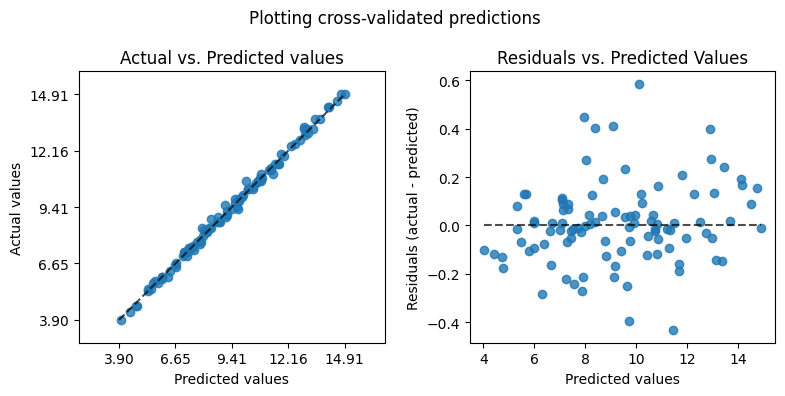

-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.8755664504683713),
             ('colsample_bynode', 0.8287039189926964),
             ('colsample_bytree', 0.41985409064507734),
             ('learning_rate', 0.053850690187120055),
             ('max_bin', 242),
             ('max_depth', 10),
             ('min_child_samples', 66),
             ('min_child_weight', 13.717049963997932),
             ('min_split_gain', 0.17948387251457049),
             ('n_estimators', 1997),
             ('num_leaves', 202),
             ('reg_alpha', 3.6168958423238414e-05),
             ('reg_lambda', 2.9128896810154983e-09),
             ('subsample', 0.6778719054948679),
             ('subsample_freq', 9)])

RMSE: 0.30543748065034626


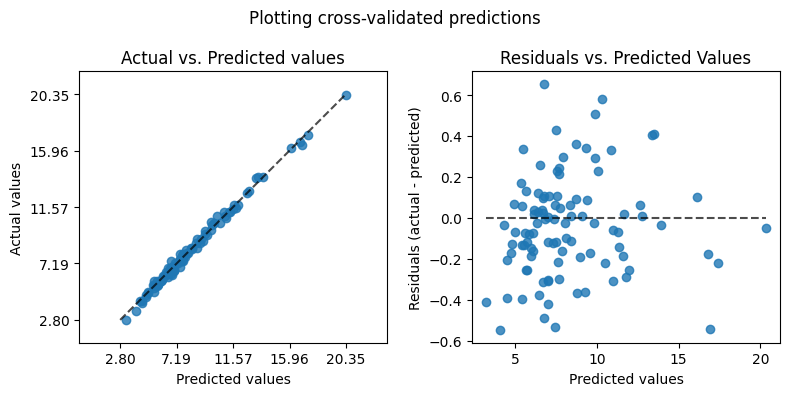

-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.7024202020147025),
             ('colsample_bynode', 0.8975495907622765),
             ('colsample_bytree', 0.5765790030482895),
             ('learning_rate', 0.02444770821146196),
             ('max_bin', 186),
             ('max_depth', 10),
             ('min_child_samples', 13),
             ('min_child_weight', 3.612079889202453),
             ('min_split_gain', 0.5638084570843857),
             ('n_estimators', 1976),
             ('num_leaves', 167),
             ('reg_alpha', 3.200099541108202e-06),
             ('reg_lambda', 8.50032024077813e-10),
             ('subsample', 0.694319685470759),
             ('subsample_freq', 3)])

RMSE: 0.5207975515873393


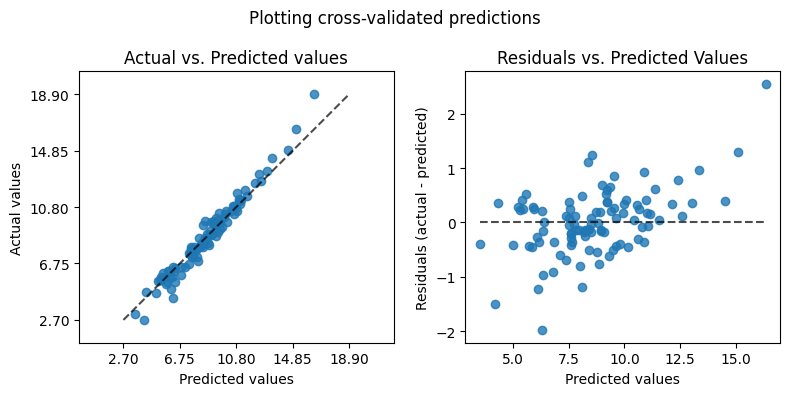

-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.436945322695666),
             ('colsample_bynode', 1.0),
             ('colsample_bytree', 0.4628485138239489),
             ('learning_rate', 0.053775527831110316),
             ('max_bin', 500),
             ('max_depth', 20),
             ('min_child_samples', 25),
             ('min_child_weight', 14.659665241206426),
             ('min_split_gain', 0.0),
             ('n_estimators', 2000),
             ('num_leaves', 300),
             ('reg_alpha', 8.707064024639065e-06),
             ('reg_lambda', 4.444198141515693e-10),
             ('subsample', 1.0),
             ('subsample_freq', 0)])

RMSE: 0.0008344668131928289


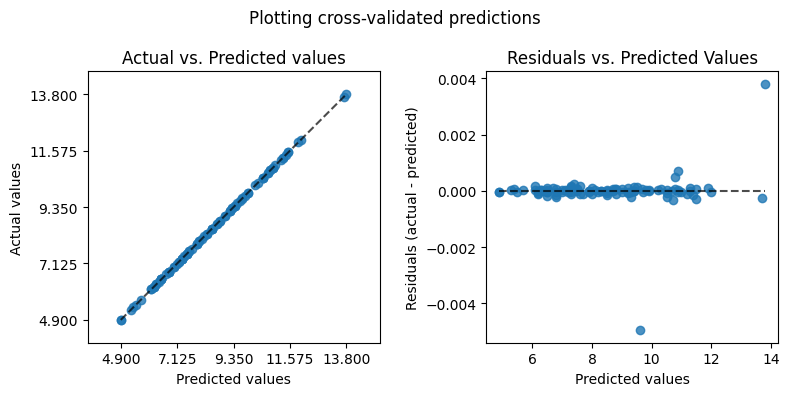

-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.4460060800232982),
             ('colsample_bynode', 0.6439584553378022),
             ('colsample_bytree', 0.5125334444450725),
             ('learning_rate', 0.028170616500489493),
             ('max_bin', 213),
             ('max_depth', 11),
             ('min_child_samples', 7),
             ('min_child_weight', 0.06710833073015159),
             ('min_split_gain', 0.0),
             ('n_estimators', 2000),
             ('num_leaves', 92),
             ('reg_alpha', 1.2669232764857653e-05),
             ('reg_lambda', 1.277137586771686e-07),
             ('subsample', 0.9613401612810013),
             ('subsample_freq', 2)])

RMSE: 0.07109475767735766


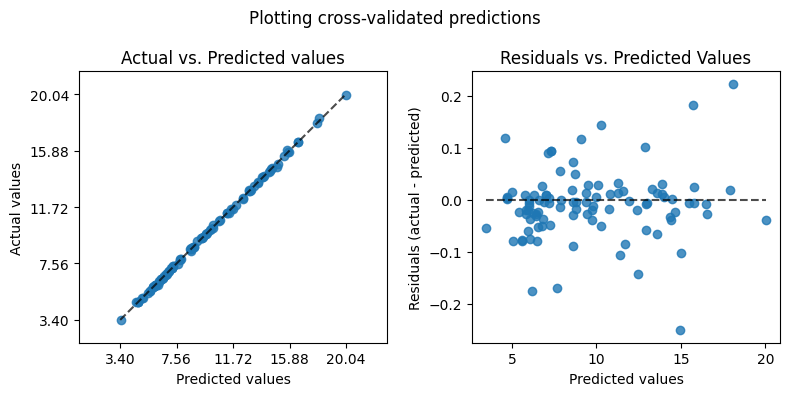

-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.4),
             ('colsample_bynode', 0.41789255359316996),
             ('colsample_bytree', 0.8108782966482433),
             ('learning_rate', 0.04091566200009774),
             ('max_bin', 229),
             ('max_depth', 17),
             ('min_child_samples', 1),
             ('min_child_weight', 11.079221355578989),
             ('min_split_gain', 0.0),
             ('n_estimators', 1893),
             ('num_leaves', 208),
             ('reg_alpha', 1.2274435958049807e-06),
             ('reg_lambda', 1.602611488685864e-08),
             ('subsample', 1.0),
             ('subsample_freq', 8)])

RMSE: 0.00250219972291664


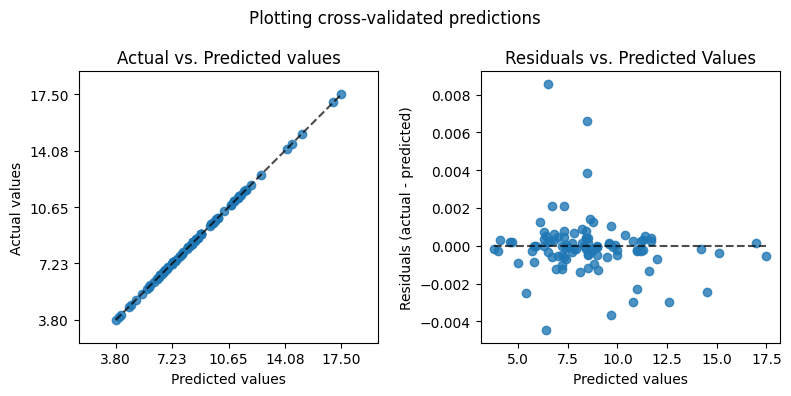

-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.4),
             ('colsample_bynode', 0.6475572531818437),
             ('colsample_bytree', 0.5290896581076461),
             ('learning_rate', 0.041672218554231116),
             ('max_bin', 145),
             ('max_depth', 12),
             ('min_child_samples', 33),
             ('min_child_weight', 0.3933642587178168),
             ('min_split_gain', 0.0),
             ('n_estimators', 2000),
             ('num_leaves', 177),
             ('reg_alpha', 3.589932212800643e-10),
             ('reg_lambda', 1e-10),
             ('subsample', 0.6117388508713363),
             ('subsample_freq', 4)])

RMSE: 0.13788782061287586


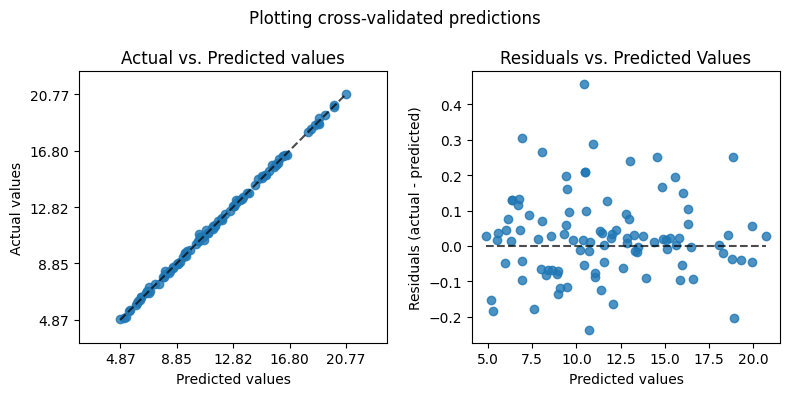

-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.9422992190664784),
             ('colsample_bynode', 0.8493795624293023),
             ('colsample_bytree', 1.0),
             ('learning_rate', 0.04446474805404636),
             ('max_bin', 466),
             ('max_depth', 11),
             ('min_child_samples', 21),
             ('min_child_weight', 0.006276492125801867),
             ('min_split_gain', 0.0),
             ('n_estimators', 2000),
             ('num_leaves', 190),
             ('reg_alpha', 3.0884554114081215e-08),
             ('reg_lambda', 4.14467004443709e-10),
             ('subsample', 0.5655509279322264),
             ('subsample_freq', 0)])

RMSE: 0.019118308384439793


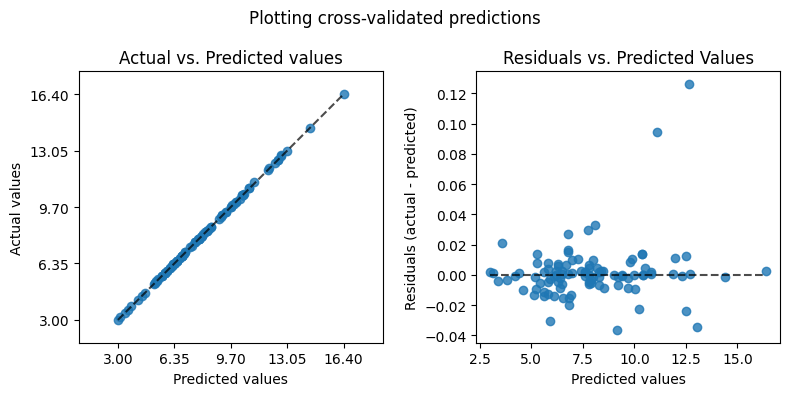

-----------LGBMRegressor-----------
Calculating best hyperparameters...
Best hyperparameters found.


OrderedDict([('colsample_bylevel', 0.8191941752602094),
             ('colsample_bynode', 0.8104342405709118),
             ('colsample_bytree', 0.9837970190626241),
             ('learning_rate', 0.0339230234063474),
             ('max_bin', 312),
             ('max_depth', 15),
             ('min_child_samples', 34),
             ('min_child_weight', 21.717473037871514),
             ('min_split_gain', 0.0),
             ('n_estimators', 1543),
             ('num_leaves', 223),
             ('reg_alpha', 7.289559435859574e-09),
             ('reg_lambda', 6.331355793079239e-10),
             ('subsample', 0.6915322810477726),
             ('subsample_freq', 0)])

RMSE: 0.03649389091094818


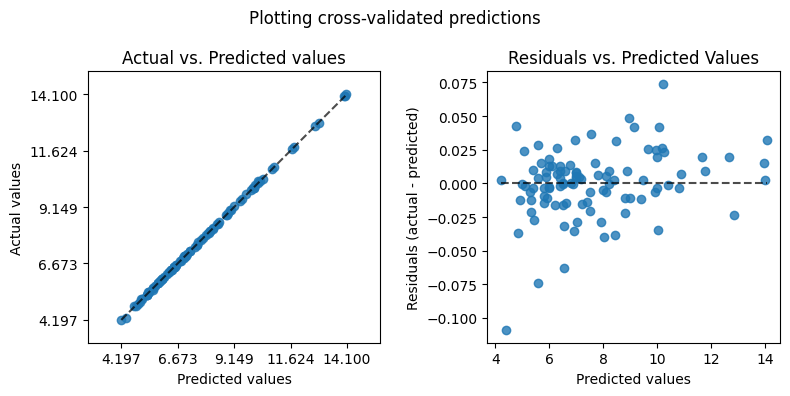

In [3]:
from pipelines import pipeline
from src.features.tuners import LGBMHyperparameterTuner
import re

for patient in unique_patients:
    patient_train_data = train_data[train_data['p_num'] == patient]
    patient_train_data_transformed = pipeline.fit_transform(patient_train_data)

    X_train = patient_train_data_transformed.drop(columns=['bg+1:00'])
    y_train = patient_train_data_transformed['bg+1:00']
    
    X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

    tune(patient, LGBMHyperparameterTuner(search_space='deep'), X_train, y_train)